In [131]:
%reset_selective -f "gates" 
%reset_selective -f "gate_times"
%reset_selective -f "gate_time"
%reset_selective -f "gate_widths"
%reset_selective -f "gate_width"
%reset_selective -f "gate_tapers"
%reset_selective -f "gate_taper"
%reset_selective -f "gate_dict_temp"
%reset_selective -f "gate_num" 
%reset_selective -f "gate_parameters" 
%reset_selective -f "gated_" 
%reset_selective -f "gated_strain" 

In [132]:
import numpy as np
from pycbc.catalog import Merger
from pycbc.strain.gate import apply_gates_to_td
from pycbc.strain import gate_data
from pylab import plot,title
import gwosc

In [143]:
from gwosc.datasets import run_segment, event_gps
gps=event_gps('GW150914')
run_time=run_segment('O1')
print(gps,run_time)

1126259462.4 (1126051217, 1137254417)


In [134]:
detectors=['H1','L1']

In [135]:
gate_times, gate_widths, gate_tapers = np.loadtxt('H1-O3_GATES_1238166018-31197600.txt',unpack=True)
gate_parameters={}
gate_num=1
gated_=(gate_times[gate_num],gate_widths[gate_num],gate_tapers[gate_num])
for det in detectors:        
    gate_parameters[det]=[(gate_times[gate_num],gate_widths[gate_num],gate_tapers[gate_num])]

In [136]:
gate_parameters

{'H1': [(1238179571.72, 0.34375, 0.5)], 'L1': [(1238179571.72, 0.34375, 0.5)]}

In [168]:
gate_para_new={'H1': [(1126259467, 0.34375, 0.5)], 'L1': [(1126259467, 0.34375, 0.5)]}

In [169]:
merger = Merger("GW150914")
strain_dict={}
for det in detectors:
    strain_dict[det] = merger.strain(det)

Text(0.5, 1.0, 'Before gating')

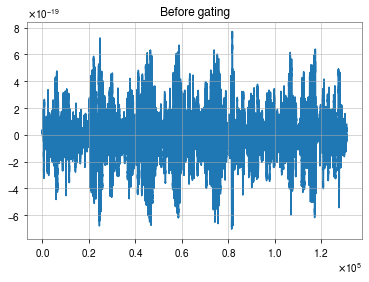

In [170]:
plot(strain_dict['H1'])
title('Before gating')

In [171]:
gated=apply_gates_to_td(strain_dict, gate_para_new)

Text(0.5, 1.0, 'After gating')

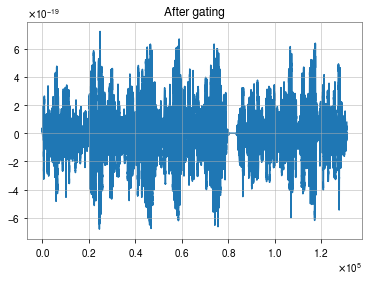

In [172]:
plot(gated['H1'])
title('After gating')